IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/temperature.csv')

In [4]:
print(data)

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   

In [5]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
data.size

193800

In [7]:
data.shape

(7752, 25)

In [8]:
data.values

array([[1.0, '30-06-2013', 28.7, ..., 5992.895996, 29.1, 21.2],
       [2.0, '30-06-2013', 31.9, ..., 5869.3125, 30.5, 22.5],
       [3.0, '30-06-2013', 31.6, ..., 5863.555664, 31.1, 23.9],
       ...,
       [25.0, '30-08-2017', 23.2, ..., 4451.345215, 27.8, 17.4],
       [nan, nan, 20.0, ..., 4329.520508, 17.4, 11.3],
       [nan, nan, 37.6, ..., 5992.895996, 38.9, 29.8]], dtype=object)

In [9]:
data.info

<bound method DataFrame.info of       station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]>

In [10]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [11]:
data = data.dropna()

In [12]:
data.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [13]:
def utils_recognize_type(data, col, max_cat=20):
    if (data[col].dtype == "O") | (data[col].nunique() < max_cat):
      return "cat"
    else:
      return "num"

# heatmap of variables
dic_cols = {col:utils_recognize_type(data, col, max_cat=20) for col in data.columns}
print(dic_cols)

{'station': 'num', 'Date': 'cat', 'Present_Tmax': 'num', 'Present_Tmin': 'num', 'LDAPS_RHmin': 'num', 'LDAPS_RHmax': 'num', 'LDAPS_Tmax_lapse': 'num', 'LDAPS_Tmin_lapse': 'num', 'LDAPS_WS': 'num', 'LDAPS_LH': 'num', 'LDAPS_CC1': 'num', 'LDAPS_CC2': 'num', 'LDAPS_CC3': 'num', 'LDAPS_CC4': 'num', 'LDAPS_PPT1': 'num', 'LDAPS_PPT2': 'num', 'LDAPS_PPT3': 'num', 'LDAPS_PPT4': 'num', 'lat': 'cat', 'lon': 'num', 'DEM': 'num', 'Slope': 'num', 'Solar radiation': 'num', 'Next_Tmax': 'num', 'Next_Tmin': 'num'}


In [14]:
for x in data.columns:
  print(x)
  if (dic_cols[x] == "num"):
      print("Mean ="+ str(data[x].mean()))
      print("Variance ="+ str(data[x].var()))
      print("Standard Deviation =" + str(data[x].std()))

station
Mean =13.014101212440696
Variance =52.097468191679035
Standard Deviation =7.21785759014952
Date
Present_Tmax
Mean =29.748365840801263
Variance =8.805465893821793
Standard Deviation =2.967400528041638
Present_Tmin
Mean =23.195809172377437
Variance =5.7642239003139055
Standard Deviation =2.4008798179654693
LDAPS_RHmin
Mean =56.72496867696231
Variance =213.93622562016228
Standard Deviation =14.626558912477066
LDAPS_RHmax
Mean =88.3608233703677
Variance =51.83217126898235
Standard Deviation =7.199456317596653
LDAPS_Tmax_lapse
Mean =29.62012769006853
Variance =8.664169071295314
Standard Deviation =2.9434960627280127
LDAPS_Tmin_lapse
Mean =23.511786156327094
Variance =5.4876757717401885
Standard Deviation =2.342578872042559
LDAPS_WS
Mean =7.0940966991598575
Variance =4.739475836556816
Standard Deviation =2.1770337242580364
LDAPS_LH
Mean =62.492606287988
Variance =1134.7572284153769
Standard Deviation =33.686157816162066
LDAPS_CC1
Mean =0.36851020603927254
Variance =0.0687802043361007

In [15]:
data.drop(columns=[
     'lat','Slope',
'LDAPS_PPT1',
'DEM',
'LDAPS_PPT2',
'LDAPS_PPT4',
'LDAPS_PPT3',
'LDAPS_RHmax',
'LDAPS_RHmax',
'LDAPS_WS',
'LDAPS_RHmin',
'LDAPS_CC4',
'LDAPS_CC1',
'LDAPS_CC2',
'LDAPS_CC3',
'LDAPS_PPT2',
'LDAPS_CC1',
'LDAPS_CC2',
'LDAPS_CC3',
'lon',
'LDAPS_CC3',
'LDAPS_LH',
'LDAPS_PPT3',
'LDAPS_RHmax',
'lat',
'LDAPS_CC4',
'LDAPS_WS',
'LDAPS_PPT4',
'Slope',
'DEM',
'Date',
 ],inplace=True)

In [16]:
data.head()

,station,Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,28.074101,23.006936,5992.895996,29.1,21.2
1,2.0,31.9,21.6,29.850689,24.035009,5869.312500,30.5,22.5
2,3.0,31.6,23.3,30.091292,24.565633,5863.555664,31.1,23.9
3,4.0,32.0,23.4,29.704629,23.326177,5856.964844,31.7,24.3
4,5.0,31.4,21.9,29.113934,23.486480,5859.552246,31.2,22.5


In [17]:
X = data.drop(['Next_Tmax','Next_Tmin'], axis=1).values
y = data[['Next_Tmax','Next_Tmin']].values

TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5311, 6)
(2277, 6)
(5311, 2)
(2277, 2)


MODEL BUILDING

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
from re import L
from sklearn.linear_model import Ridge,Lasso,ElasticNet
model2 = Lasso()
model1 = Ridge()
model3 = ElasticNet()
model3.fit(X_train, y_train)
model2.fit(X_train, y_train)
model1.fit(X_train, y_train)

Ridge()

In [30]:
model.score(X_train, y_train)

0.772103232023476

In [31]:
model.score(X_test, y_test)

0.772515765556332

In [29]:
model1.score(X_train, y_train)

0.7721032312438696

In [32]:
model1.score(X_test, y_test)

0.7725148367989916

In [33]:
model2.score(X_train, y_train)

0.7465505464008451

In [34]:
model2.score(X_test, y_test)

0.7416310117275215

In [35]:
model3.score(X_train, y_train)

0.7585846961995877

In [36]:
model3.score(X_test, y_test)

0.7546121187926462

In [37]:
c = model.intercept_

In [38]:
c

array([ 1.99754774, -1.18676681])

In [39]:
m= model.coef_
m

array([[ 1.41311479e-02,  1.96543836e-01,  1.70712303e-02,
         7.73129717e-01, -2.09784364e-02, -1.14664144e-04],
       [ 7.91787914e-03,  3.93453236e-02,  2.67866863e-01,
         2.51867579e-02,  6.59498785e-01,  6.75244774e-05]])

PREDICTION

In [40]:
y_predict_train = model.predict(X_train)

In [41]:
y_predict_train2 = model2.predict(X_train)

In [42]:
y_predict_test = model.predict(X_test)

In [43]:
y_predict_train

array([[31.84922388, 25.43710964],
       [29.77073964, 25.17479616],
       [30.54377929, 22.41700047],
       ...,
       [30.66290308, 24.7889335 ],
       [30.2674747 , 21.28783601],
       [27.78130185, 21.93232096]])

DATA VISUALIZATION

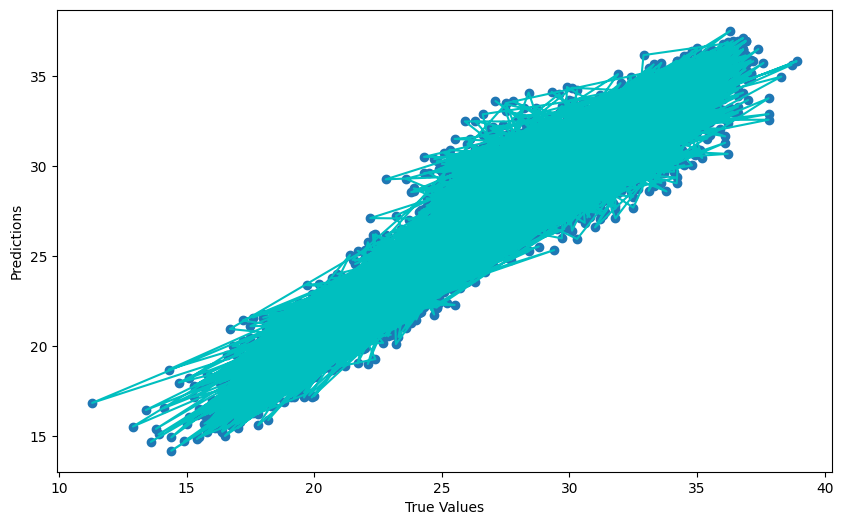

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_predict_train)
plt.plot(y_train, y_predict_train, color='c')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

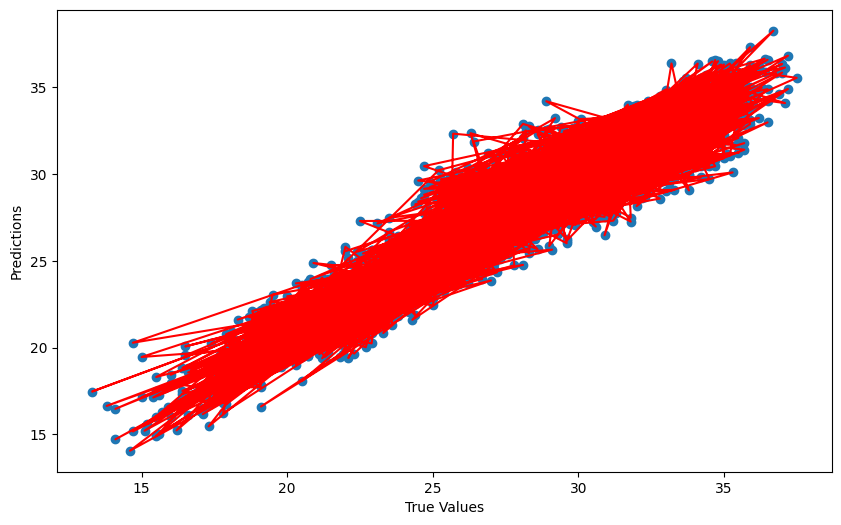

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predict_test)
plt.plot(y_test, y_predict_test, color='r')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show

In [46]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predict_train)


0.772103232023476

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict_test)

0.772515765556332

In [48]:
model.predict([[1.0, 28.7, 21.4, 28.074101, 23.006936, 5992.895996]])

array([[28.55291326, 21.96752181]])

In [49]:
model.predict([[2.0, 31.9, 21.6, 29.850689, 24.035009, 5869.312500]])

array([[30.56553514, 22.86933257]])

CONCLUSION
- THE MINIMUM TEMPERATURE FOR THE NEXT DAY = 22.8 DEGREES
- THE MAXIMUM TEMPERATUE FOR THE NEXT DAY = 30.5 DEGREES